# Training Mobile Ready Light Models

## Table of Contents

- [Introduction](#Introduction)
- [Prerequisites](#Prerequisites)
- [Supported Models](#Supported-Models)
- [Imports](#Imports)
- [Data preparation](#Data-preparation)
- [Visualize Training data](#Visualize-Training-data)
- [Train Model](#Train-Model)
    - [Model instantiation options](#Model-instantiation-options)
- [Saving Model](#Saving-Model)
- [Deployment](#Deployment)

## Introduction

We can use `arcgis.learn` to train deep learning models, that can can be deployed on mobile devices using ArcGIS field apps. This enables AI on the edge and simplify jobs of field workers. This is done using Tensorflow which enables us to save trained models to tflite format. A few applications of this workflow are 
- Assisted intelligent survey,
- Disconnected Descision support,
- Automatic feature extraction from street view,
- Automated Rapid data collection on the move,


 In this sample we are going to use street view data from ESRI campus, we have labeled a few fire water hydrants. 

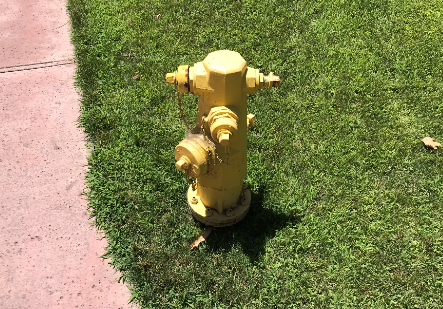

# Prerequisites

- To train mobile ready light models **tensorflow** needs to be installed in addition to fastai and pytorch, please refer to the section "Install deep learning dependencies of arcgis.learn module" [on this page](https://developers.arcgis.com/python/guide/install-and-set-up/) for detailed documentation on installation of these dependencies.


## Supported Models

Currently the following models can be used to deploy on mobile devices.  
- SingleShotDetector
- UnetClassifier
- FeatureClassifier

## Set Environment Variables

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
%env ARCGIS_ENABLE_TF_BACKEND=1

env: ARCGIS_ENABLE_TF_BACKEND=1


## Imports

In [2]:
from arcgis.learn import prepare_data, SingleShotDetector

In [3]:
data = prepare_data(
    'Esri Campus Street view',
    dataset_type='PASCAL_VOC_rectangles',
    batch_size=16
)

## Visualize Training data

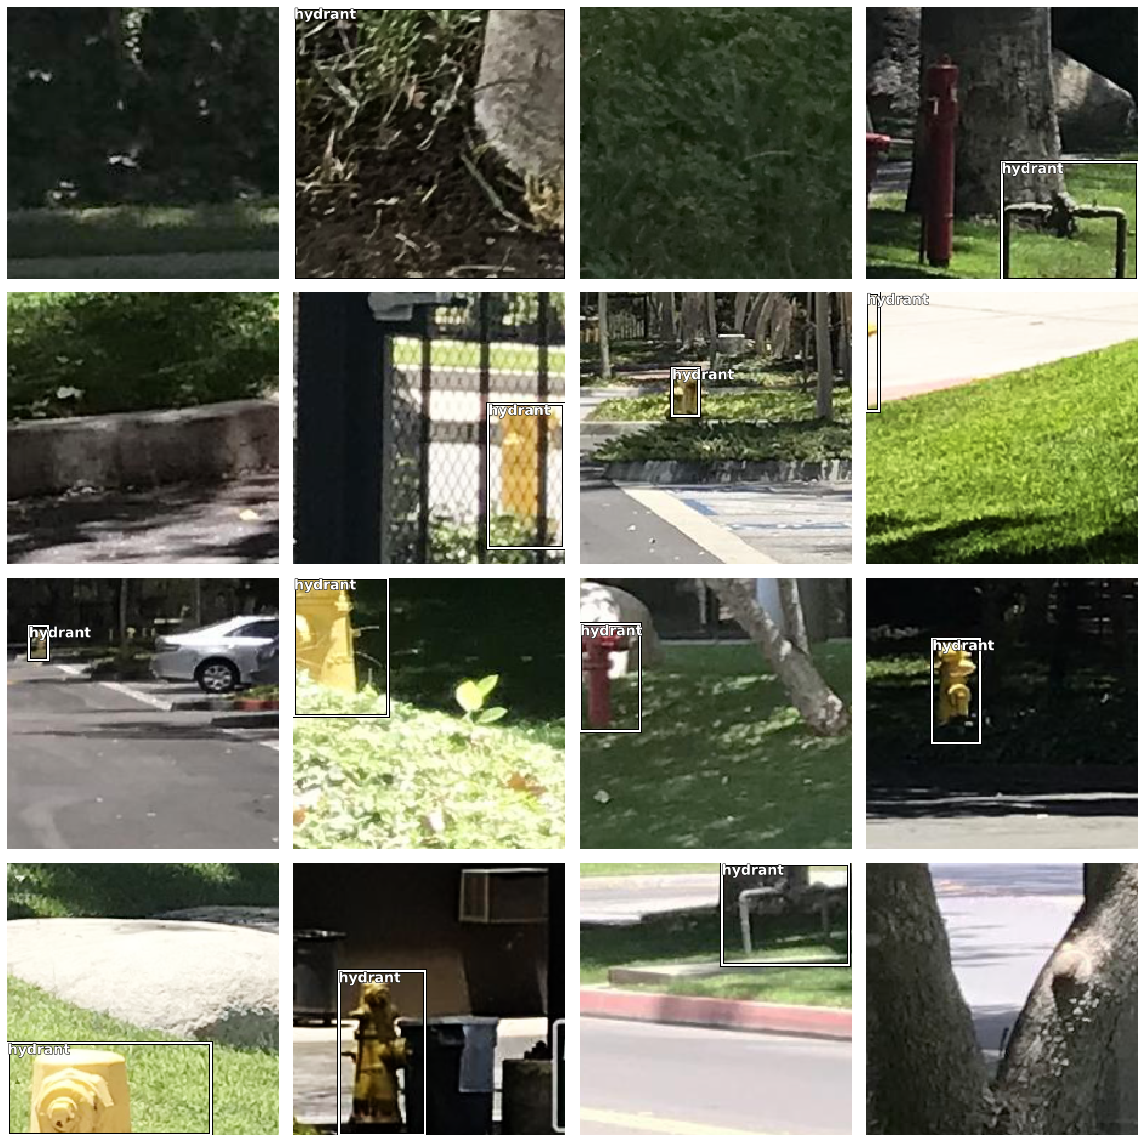

In [4]:
data.show_batch()

## Train Model

### Model instantiation options


 - `backbone`: Make sure you pick a mobile optimised backbone, currently we only support 'MobileNetV2' backbone.
 - `backend`: **Important !**, Make sure you select the backend as 'tensorflow' to enable saving the model to tflite format.

In [5]:
model = SingleShotDetector(data, backbone='MobileNetV2', backend='tensorflow')

In [ ]:
model.lr_find()

epoch,train_loss,valid_loss,time
0,106.445030,#na#,02:04
1,94.053703,#na#,02:06


Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes


Instructions for updating:
Use tf.identity instead.


Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Retu

Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Retu

Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Returning zero tensors as there is no overlap between ground truth and prior boxes
Retu

In [ ]:
model.fit(10, .001)

In [ ]:
model.show_results()

## Saving Model

## Deployment